# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import backend
from kernels import LinearKernel, GaussianKernel, GramCSVKernel, FeatureCSVKernel, MultipleKernel

Academic license - for non-commercial use only


Kernel computed on the fly on imported data

In [4]:
kernels1 = LinearKernel().load("mat100", indices=[0, 1, 2])

Linear kernel computed on the fly on imported features

In [5]:
kernels2a = FeatureCSVKernel("SpectralKernel", {}).load("spectr6", indices=[0, 1, 2])

kernels2b = FeatureCSVKernel("TranslatedKernel", {}).load("trans6", indices=[0, 1, 2])

Precomputed kernel defined from stored Gram matrices

In [6]:
kernels3 = GramCSVKernel("SubstringKernel", {}).load("substring4_0.7", indices=[0])

Parameter tuning

In [7]:
lambdas = np.logspace(-4, 0., 3)

Tuning lambda on dataset 0 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'spectr6', 'trans6'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'trans6'}], 'grad_step': 1, 'iterations': 10}: 100%|██████████| 3/3 [00:44<00:00, 14.98s/it]


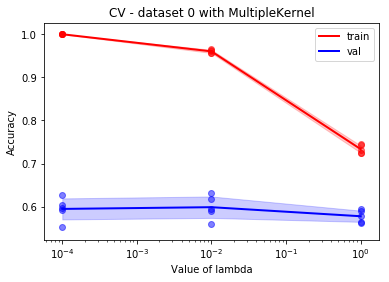

Tuning lambda on dataset 1 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'spectr6', 'trans6'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'trans6'}], 'grad_step': 1, 'iterations': 10}: 100%|██████████| 3/3 [00:43<00:00, 14.59s/it]


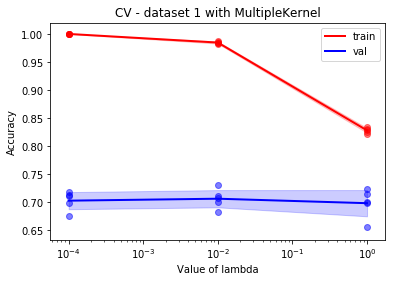

Tuning lambda on dataset 2 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'spectr6', 'trans6'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'trans6'}], 'grad_step': 1, 'iterations': 10}: 100%|██████████| 3/3 [00:44<00:00, 15.25s/it]


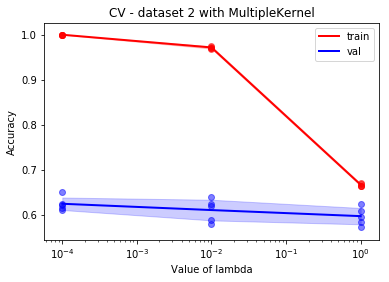

In [10]:
three_kernels = []
three_lambdas = []

use_multiple_kernel = True

for d in range(3):

    if use_multiple_kernel:
        kernels_to_combine = [kernels1[d], kernels2a[d], kernels2b[d]]
        best_kernel = MultipleKernel(
            kernels_to_combine,
            grad_step=1, iterations=10)
        best_lambd = backend.tune_parameters(
            [best_kernel], lambdas,
            plot=True, result="best_lambdas")[0]
        
    else:
        kernels_to_compare = [kernels1[d], kernels2a[d], kernels2b[d]]
        best_kernel, best_lambd = backend.tune_parameters(
            kernels_to_compare, lambdas,
            plot=True, result="best_kernel_lambda")
        
    three_kernels.append(best_kernel)
    three_lambdas.append(best_lambd)

In [11]:
backend.final_prediction(three_kernels, three_lambdas)

DATASET 0
DATASET 1
DATASET 2
